# 정형 데이터 전처리
- https://roadbook.co.kr/242 의 bank.csv 파일로 진행  

## 데이터 이해
- 언제, 어디에서, 왜 데이터를 취득했는가?
- 데이터는 어느 정도 간격을 두고 취득했는가?
- 데이터는 무엇을 의미하고 있는가?
- 데이터를 취득할 때 빠진 사항은 없었는가? 완성되어 있는가?
- 데이터에 결손값과 범위 외의 값이 포함되어 있는가?
- 데이터의 항목 간에 관련성은 있는가?

### 데이터 읽기와 확인
- Pandas를 이용해 업로드한 파일을 분석 데이터 세트로 읽어 오기

In [78]:
import pandas as pd

bank_df = pd.read_csv('bank.csv', sep=',') # bacnk-full.csv 파일의 식별자 ',' 정의
bank_df.head() # head()를 통한 5행 출력

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [79]:
bank_df.tail(10) # 뒤에서 10행까지 출력

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [80]:
print(bank_df.shape) #dataframe의 행, 열 확인

(7234, 17)


In [81]:
print(bank_df.dtypes) #dataframe의 데이터 타입 확인

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


### 결손값 확인
- 본 실습에 사용한 데이터(Bank.csv)는 결손값이 없는 데이터임

In [82]:
print(bank_df.isnull().any(axis=1)) # any(axis=1)을 통해 행 방향에 대해 결손값 유무 조사
print(bank_df.isnull().any(axis=0)) # any(axis=1)을 통해 열 방향에 대해 결손값 유무 조사

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [83]:
print(bank_df.isnull().sum(axis=1)) # any(axis=1)을 통해 행 방향에 대해 결손값 개수 파악
print(bank_df.isnull().sum(axis=0)) # any(axis=1)을 통해 열 방향에 대해 결손값 개수 파악

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [84]:
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False)) #결손값의 개수가 많은 순서로 정렬

1837    4
1629    4
139     4
1814    4
1670    4
       ..
5919    0
5918    0
5917    0
5916    0
5379    0
Length: 7234, dtype: int64


### 통계량계산

In [85]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


- describe()를 통해 bank_df의 통계량을 출력함
- 결과를 통해 count(개수), mean(평균), std(표준편차), min(최솟값), 25%(제1사분위값), 50%(제2사분위값, 중앙치), 75%(제3사분위값), max(최댓값) 출력
- 중앙치와 최빈치는 데이터 셋에 포함되지 못한 특이값(이상치)의 영향을 받지 않는 성질이 있음

In [86]:
bank_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


- include=[object] 옵션을 통해 objet형 항목의 통계량을 출력함
- count(개수), unique(특별한 값, 유니크 한 수), top(최빈치), freq(최빈치의 출현횟수)가 출력됨
- 이는 데이터 셋을 설명하기 위한 대표 값임

## 데이터시각화
- Matplotlib를 사용해 데이터 시각화 및 분포 확인

<function matplotlib.pyplot.show(*args, **kw)>

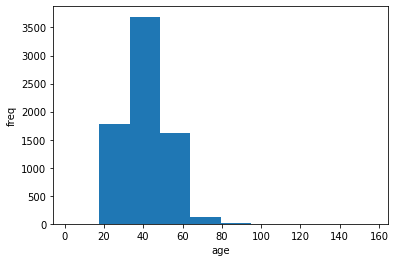

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bank_df['age']) # 다른 Column 값을 넣어 histogram 작성 가능
plt.xlabel('age')  # 다른 Column 값을 넣어 histogram 작성 가능
plt.ylabel('freq')
plt.show

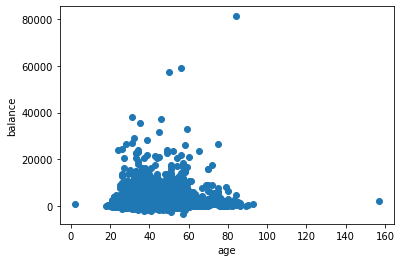

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [88]:
plt.scatter(bank_df['age'], bank_df['balance'])  # 다른 Column 값을 넣어 Scatter Plot 작성 가능
plt.xlabel('age')  # 다른 Column 값을 넣어 Scatter Plot 작성 가능
plt.ylabel('balance')  # 다른 Column 값을 넣어 Scatter Plot 작성 가능
plt.show()

bank_df[['age', 'balance']].corr()  # 다른 Column 값을 넣어 상관관계 출력 가능

- scatter()를 사용하여 bank_df의 age, blance의 Scatter graph(산포도) 작성
- corr()를 사용하여 age, blance의 상관계수(Correlation) 계산
- 양의 상관(0.4 ~ 1.0), 음의 상관(-1.0 ~ -0.4)
- 공산성(Collinearity)에 대해서 고려도 해야함, 공산성이란 변수간에 강하게 상관해 발생하는 문제임
- 아울러, 상관관계가 있다고해서 인과관계(원인과 결과)가 무조건 있다고 할 수 없음

In [89]:
# 문자열 데이터를 가진 'job' Column의 라벨들 간 비율 계산
print(bank_df['job'].value_counts(ascending=False, normalize=True))

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


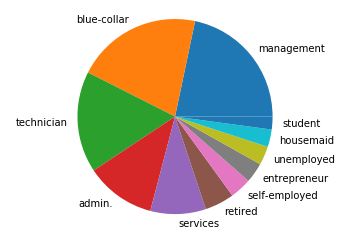

In [90]:
ratio = bank_df['job'].value_counts(ascending=False, normalize=True) # 대상 변수와 vals 개수 매칭 필요

job_label = ratio.index
#job_vals = ratio.value #'Series' object has no attribute 'value' 에러 발생
job_vals = ratio[:12]

plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

- plt.pie() 함수 사용하여 파이차트 생성

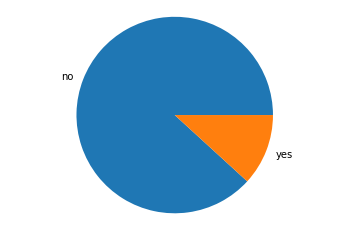

In [91]:
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

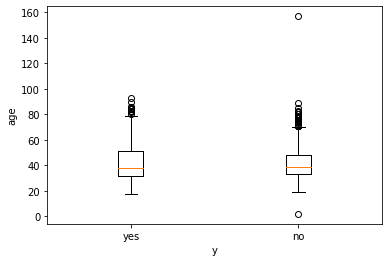

In [92]:
# y가 yes나 no일때의 age데이터를 추출
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
# yes와 no의 데이터를 정리
y_age = [y_yes['age'], y_no['age']]

# 박스수염 플롯의 작성
plt.boxplot(y_age)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
# y축 （종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

- age를 대상으로 상자수염 그림(box-and-whisker plot)을 표현
- 박스 안의 주황 선은 중앙치를 나타내며, 박스의 높이는 사분위의 범위(제3사분위수, 제1사분위수)를 뜻함
- 동그라미는 이상치에 속할 확률이 높음